In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import joblib

In [13]:
# Load the dataset
df = pd.read_csv('breast_cancer.csv')

In [14]:
# Separate features (questions) and labels
questions = df['Question'].tolist()
X = df.drop(['ID', 'Question', 'Label'], axis=1)
y = df['Label']

In [15]:
# Encode categorical feature (answers)
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [17]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


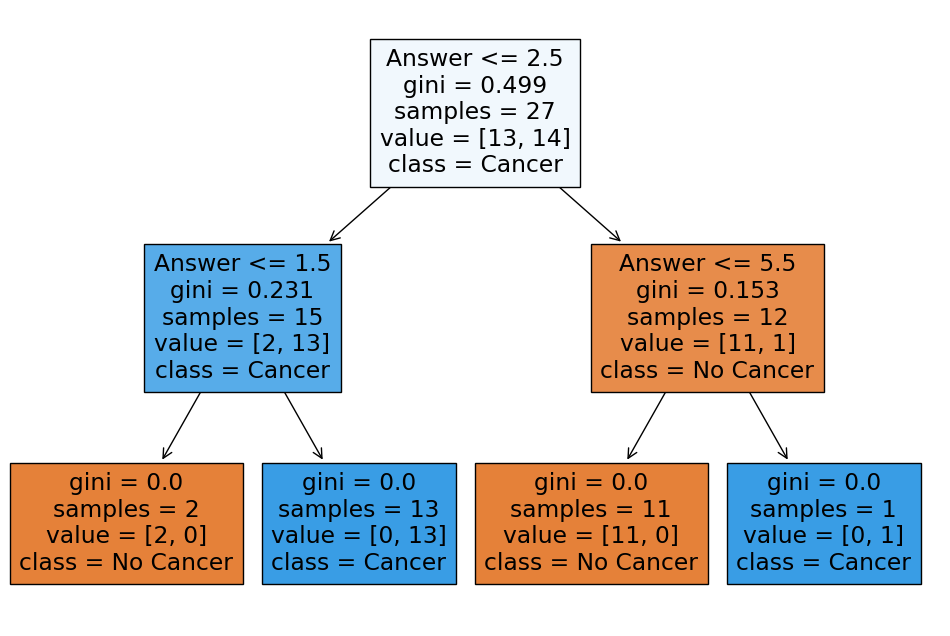

In [19]:
# Visualize the decision tree
fig = plt.figure(figsize=(12, 8))
_ = tree.plot_tree(clf, feature_names=X.columns, class_names=['No Cancer', 'Cancer'], filled=True)

# Save the figure as a PNG image
fig.savefig('decision_tree.png')

# Display the figure
plt.show()

In [20]:
# Create a dictionary to store the question and answer mapping
question_answer_dict = {}

# Iterate over each row in the dataset
for index, row in df.iterrows():
    question = row['Question']
    answer = row['Answer']

    # Assign the answer to the question in the dictionary
    if question in question_answer_dict:
        # If the question already exists, concatenate the new answer with the existing answer
        question_answer_dict[question] += ", " + answer
    else:
        # If it's a new question, assign the answer directly
        question_answer_dict[question] = answer

# Save the trained model
joblib.dump(clf, 'decision_tree_model.joblib')

# Load the saved model
loaded_model = joblib.load('decision_tree_model.joblib')

# Make predictions on new data
new_data = pd.DataFrame([question_answer_dict]).T
new_data.columns = ['Answer']
new_data_encoded = new_data.apply(label_encoder.transform)
predictions = loaded_model.predict(new_data_encoded)

# Print the predictions
print(predictions)


[0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1]


In [22]:
# Calculate the aggregated prediction
aggregated_prediction = sum(predictions) / len(predictions)

# Set the threshold for classifying cancer
threshold = 0.5

# Classify the person based on the aggregated prediction
if aggregated_prediction > threshold:
    result = "Patient might have cancer should concern with doctor for further treatment."
else:
    result = "Patient does not have cancer"

# Print the result
print(result)


Patient might have cancer should concern with doctor for further treatment.
